In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute  import KNNImputer

In [26]:
df=sns.load_dataset('titanic')
df=df[['age','embarked','survived']]
df

,age,embarked,survived
0,22.0,S,0
1,38.0,C,1
2,26.0,S,1
3,35.0,S,1
4,35.0,S,0
...,...,...,...
886,27.0,S,0
887,19.0,S,1
888,NaN,S,0
889,26.0,C,1


<Axes: ylabel='age'>

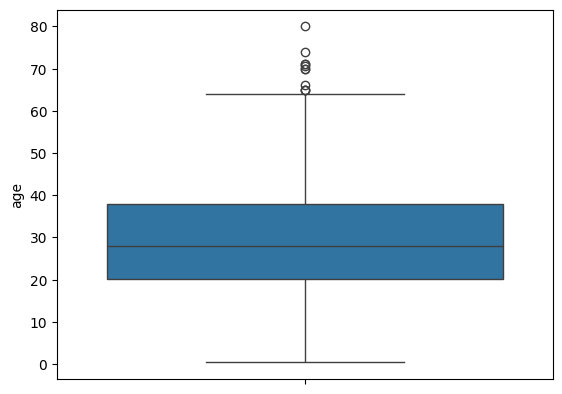

In [27]:
sns.boxplot(df['age'])

<Axes: xlabel='age', ylabel='Density'>

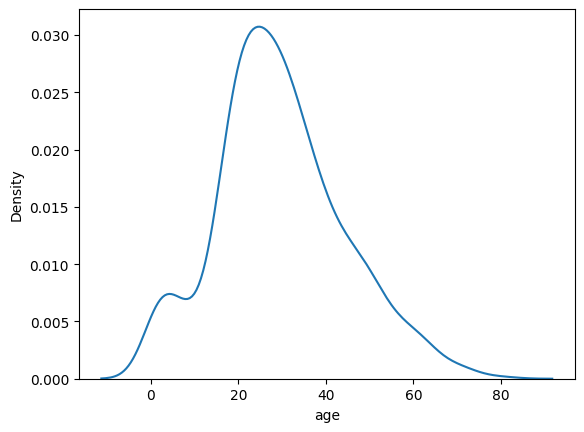

In [28]:
sns.kdeplot(df['age'])

Z_Score

In [29]:
upper_limit=((df['age'].mean())+df['age'].std()*3)
lower_limit=((df['age'].mean())-df['age'].std()*3)

In [41]:
# Trimming

new_df=df[(df['age']<upper_limit) & (df['age']>lower_limit)]
new_df

,age,embarked,survived
0,22.0,S,0
1,38.0,C,1
2,26.0,S,1
3,35.0,S,1
4,35.0,S,0
...,...,...,...
885,39.0,Q,0
886,27.0,S,0
887,19.0,S,1
889,26.0,C,1


<Axes: ylabel='age'>

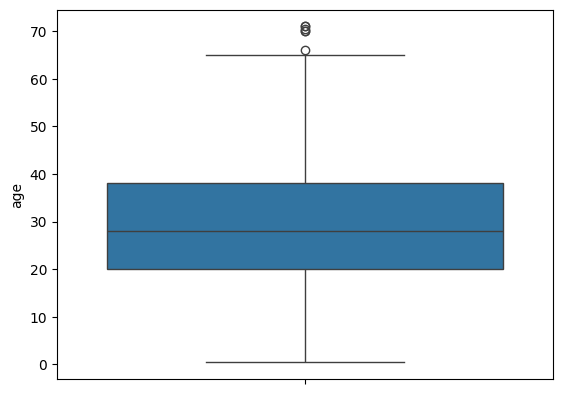

In [42]:
sns.boxplot(new_df['age'])

<Axes: xlabel='age', ylabel='Density'>

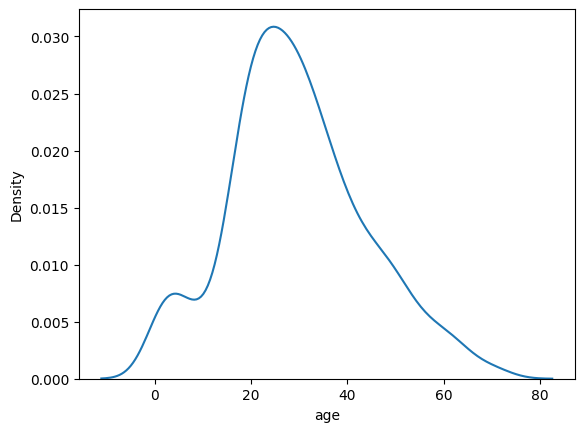

In [43]:
sns.kdeplot(new_df['age'])

In [44]:
# Capping

cap=np.where((df['age']>upper_limit),upper_limit,np.where((df['age']<lower_limit),lower_limit,df['age']))

<Axes: >

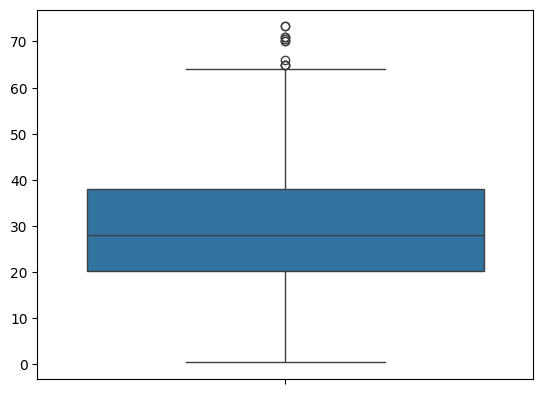

In [47]:
sns.boxplot(cap)

<Axes: ylabel='Density'>

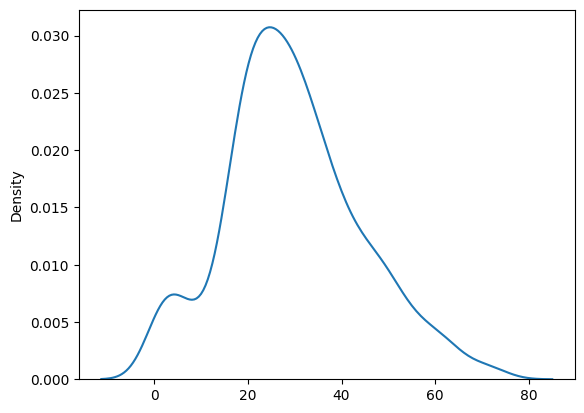

In [46]:
sns.kdeplot(cap)

IQR boxplot   -> useful when data is skewed

In [64]:
df=sns.load_dataset('titanic')
df=df[['fare']]

In [65]:
df['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [82]:
df.skew()

fare    4.787317
dtype: float64

In [73]:
lower_lim=( 7.910400 - ((1.5)*(31- 7.910400)))
upper_lim=(31 +((1.5)*(31-7.910400)))
upper_lim

65.6344

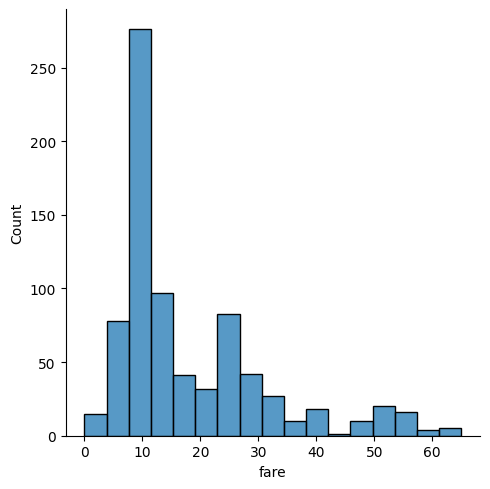

In [88]:
# TRimming

new=df[(df['fare']< 65.6344 ) & (df['fare'] > lower_lim )]

sns.displot(new['fare'])

<Axes: >

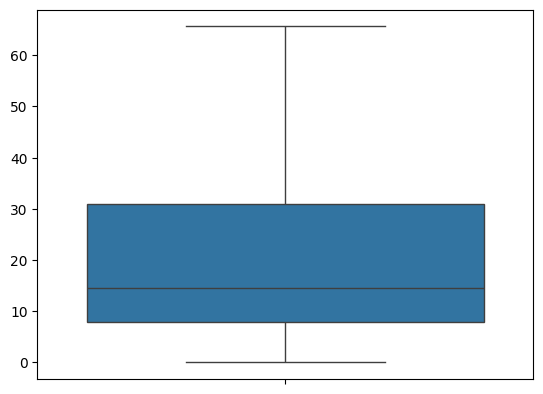

In [86]:
# Capping

cap=np.where((df['fare']>upper_lim),upper_lim,np.where((df['fare']<lower_lim),lower_lim,df['fare']))
sns.boxplot(cap)